## 数据集预览

In [3]:
import pandas as pd
data = pd.read_csv("./data.csv",encoding='gbk')
print(data.shape)
data.head()

(4754, 90)


,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [4]:
# 观察各列的属性名称
data.columns

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

## 数据预处理

> 无用特征删除、字符型特征编码和缺失值填充。

###  删除无用特征

'bank_card_no','source'的取值**无区分度**

'Unnamed: 0', 'custid', 'trade_no'和id_name'**与预测无关**

In [5]:
data.drop(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source', 'id_name'], 
          axis=1, inplace=True)
print(data.shape)

(4754, 84)


**日期特征**（暂时删除, 以后再处理。）

In [6]:
data.drop(['first_transaction_time', 'latest_query_time', 'loans_latest_time'], 
          axis=1, inplace=True)

### 字符型特征-编码

In [7]:
data['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

In [8]:
dic = {}
for i, val in enumerate(list(data['reg_preference_for_trad'].unique())):
    dic[val] = i

In [9]:
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(dic)

### 缺失值处理

In [10]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        print('%.4f'%(summ*100/4754), '%',  '--', feature)

0.0421 % -- low_volume_percent
0.0421 % -- middle_volume_percent
0.0631 % -- trans_amount_increase_rate_lately
0.0421 % -- trans_activity_month
0.0421 % -- trans_activity_day
0.0421 % -- transd_mcc
0.1683 % -- trans_days_interval_filter
0.0421 % -- trans_days_interval
0.0421 % -- regional_mobility
63.0627 % -- student_feature
0.0421 % -- number_of_trans_from_2011
0.0421 % -- historical_trans_day
0.0421 % -- rank_trad_1_month
0.0421 % -- avg_consume_less_12_valid_month
0.0421 % -- top_trans_count_last_1_month
2.1876 % -- avg_price_top_last_12_valid_month
0.1683 % -- trans_top_time_last_1_month
0.1683 % -- trans_top_time_last_6_month
0.1683 % -- consume_top_time_last_1_month
0.1683 % -- consume_top_time_last_6_month
8.9609 % -- cross_consume_count_last_1_month
0.3366 % -- trans_fail_top_count_enum_last_1_month
0.3366 % -- trans_fail_top_count_enum_last_6_month
0.3366 % -- trans_fail_top_count_enum_last_12_month
0.5469 % -- consume_mini_time_last_1_month
0.1683 % -- max_consume_count_late

1) student_feature 缺失占比多, 需要用**众数**填充;

In [11]:
data['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [12]:
data['student_feature'].fillna(1.0, inplace = True)

In [13]:
data['student_feature'].value_counts()

1.0    4752
2.0       2
Name: student_feature, dtype: int64

2) 其余特征用**均值**填充。

In [14]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        data[feature].fillna(data[feature].mean(), inplace = True)

'Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source'都没用, 'id_name'表示姓名, 没用？

'take_amount_in_later_12_month_highest'数值跨度可能较大, 归一化？

某些特征可能包含缺失值NAN

'reg_preference_for_trad'需要编码

'latest_query_time', 'loans_latest_time'为日期特征

### 数据集划分

In [15]:
features = [x for x in data.columns if x not in ['status']]

In [26]:
import warnings
warnings.filterwarnings("ignore")
# 划分训练集测试集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[features]
y = data.status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2333)

# 特征归一化
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### LR模型

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### SVM模型



In [28]:
from sklearn import svm

svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

### 决策树模型

> 树模型，特征不需归一化。

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### XGBoost模型

In [30]:
import warnings
warnings.filterwarnings("ignore")
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### LightGBM模型

In [31]:
from lightgbm.sklearn import LGBMClassifier

lgb= LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 模型调参

In [32]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
lr_param = {'penalty': ('l1', 'l2'), 'C': [0.0001,0.001,0.01,0.1,1,10,100,1000]}

grid = GridSearchCV(lr, param_grid = lr_param, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_params_, grid.best_score_)

{'C': 0.1, 'penalty': 'l1'} 0.7883979561166216


## 模型评估

> 观察accuracy、precision，recall和f1-score、auc的取值，并画出roc曲线图

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率
    print('[精准率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

[准确率] 训练集： 0.7995 测试集： 0.8024
[精准率] 训练集： 0.7094 测试集： 0.7052
[召回率] 训练集： 0.3488 测试集： 0.3456
[f1-score] 训练集： 0.4677 测试集： 0.4639
[auc值] 训练集： 0.8054 测试集： 0.8050


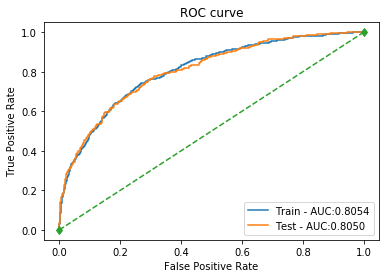

In [47]:
# 逻辑回归
model_metrics(lr, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7908 测试集： 0.7947
[精准率] 训练集： 0.7647 测试集： 0.7885
[召回率] 训练集： 0.2476 测试集： 0.2323
[f1-score] 训练集： 0.3741 测试集： 0.3589
[auc值] 训练集： 0.8042 测试集： 0.8092


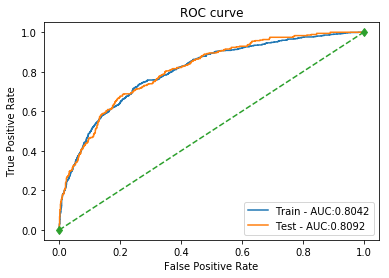

In [36]:
# 线性SVM
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8284 测试集： 0.7554
[精准率] 训练集： 0.9786 测试集： 0.5208
[召回率] 训练集： 0.3274 测试集： 0.1416
[f1-score] 训练集： 0.4906 测试集： 0.2227
[auc值] 训练集： 0.9391 测试集： 0.7117


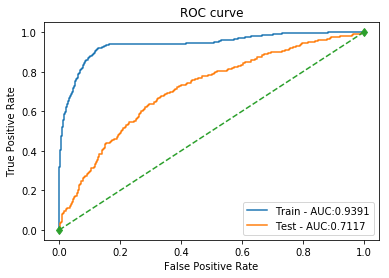

In [37]:
# 多项式SVM
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8266 测试集： 0.7975
[精准率] 训练集： 0.9046 测试集： 0.7963
[召回率] 训练集： 0.3500 测试集： 0.2436
[f1-score] 训练集： 0.5047 测试集： 0.3731
[auc值] 训练集： 0.9170 测试集： 0.7680


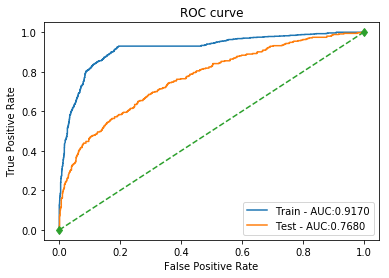

In [38]:
# 高斯核SVM
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7205 测试集： 0.7379
[精准率] 训练集： 0.4373 测试集： 0.4662
[召回率] 训练集： 0.3738 测试集： 0.4108
[f1-score] 训练集： 0.4031 测试集： 0.4367
[auc值] 训练集： 0.6600 测试集： 0.6784


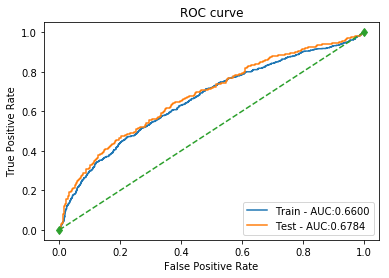

In [39]:
# sigmoid-SVM
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7920 测试集： 0.7737
[精准率] 训练集： 0.6581 测试集： 0.5862
[召回率] 训练集： 0.3667 测试集： 0.2890
[f1-score] 训练集： 0.4709 测试集： 0.3871
[auc值] 训练集： 0.7727 测试集： 0.7468


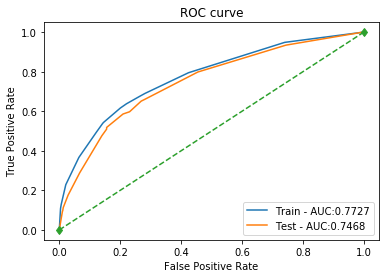

In [40]:
# 决策树
model_metrics(dt, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8521 测试集： 0.8045
[精准率] 训练集： 0.8718 测试集： 0.7079
[召回率] 训练集： 0.4857 测试集： 0.3569
[f1-score] 训练集： 0.6239 测试集： 0.4746
[auc值] 训练集： 0.9166 测试集： 0.7972


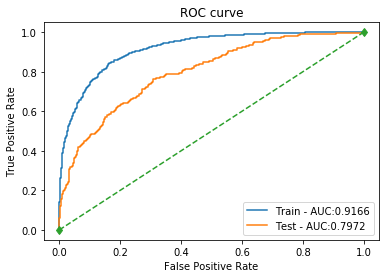

In [41]:
# XGBoost
model_metrics(xgb, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.9949 测试集： 0.7961
[精准率] 训练集： 1.0000 测试集： 0.6550
[召回率] 训练集： 0.9798 测试集： 0.3711
[f1-score] 训练集： 0.9898 测试集： 0.4738
[auc值] 训练集： 1.0000 测试集： 0.7869


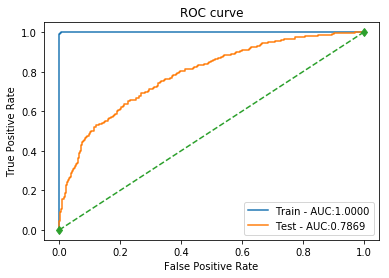

In [45]:
# lightGBM
model_metrics(lgb, X_train, X_test, y_train, y_test)